In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [116]:
# Data
data = {
    'Math':    [85, 88, 90, 55, 53, 58, 40, 42, 38, 65, 67, 66],
    'Science': [78, 80, 82, 60, 58, 62, 45, 43, 41, 60, 62, 61],
    'English': [90, 92, 93, 58, 55, 60, 42, 40, 45, 67, 69, 68],
    'Performance': [1,1,1,0,0,0,0,0,0,1,1,1]
}
df = pd.DataFrame(data)

In [118]:
# Features
X = df[['Math', 'Science', 'English']]
y_true = df['Performance']

In [120]:
# Fix: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
# Apply DBSCAN
db = DBSCAN(eps=0.5, min_samples=2)
y_cluster = db.fit_predict(X_scaled)



In [124]:
# Add cluster to DataFrame
df['cluster'] = y_cluster

In [126]:
# Output
print(df)

    Math  Science  English  Performance  cluster
0     85       78       90            1        0
1     88       80       92            1        0
2     90       82       93            1        0
3     55       60       58            0        1
4     53       58       55            0        1
5     58       62       60            0        1
6     40       45       42            0        2
7     42       43       40            0        2
8     38       41       45            0        2
9     65       60       67            1        3
10    67       62       69            1        3
11    66       61       68            1        3


### we conclude the DBScan


In [129]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [131]:
# Remove noise points (cluster = -1)
df_valid = df[df['cluster'] != -1].copy()


In [133]:
print(df_valid)

    Math  Science  English  Performance  cluster
0     85       78       90            1        0
1     88       80       92            1        0
2     90       82       93            1        0
3     55       60       58            0        1
4     53       58       55            0        1
5     58       62       60            0        1
6     40       45       42            0        2
7     42       43       40            0        2
8     38       41       45            0        2
9     65       60       67            1        3
10    67       62       69            1        3
11    66       61       68            1        3


In [148]:
y_true_valid=df_valid['Performance']
y_pred_cluster = df_valid['cluster'].map({0:1, 1:0, 2:1, -1:0}).fillna(0).astype(int)


In [150]:
acc = accuracy_score(y_true_valid, y_pred_cluster)
prec = precision_score(y_true_valid, y_pred_cluster)
rec = recall_score(y_true_valid, y_pred_cluster)
f1 = f1_score(y_true_valid, y_pred_cluster)
cm = confusion_matrix(y_true_valid, y_pred_cluster)

print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.50
Precision: 0.50
Recall: 0.50
F1 Score: 0.50
Confusion Matrix:
[[3 3]
 [3 3]]


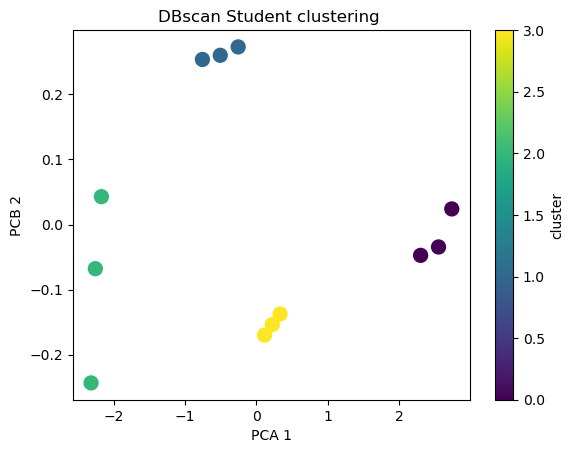

In [152]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Correct the parameter name here:
pca = PCA(n_components=2)

# Assuming x_scaled is your scaled feature matrix
reduced = pca.fit_transform(X_scaled)

# Plot the PCA result
plt.scatter(reduced[:,0],reduced[:,1],c=df['cluster'],cmap='viridis',s=100)


plt.xlabel('PCA 1')
plt.ylabel('PCB 2')
plt.title('DBscan Student clustering ')
plt.colorbar(label='cluster')
plt.show()

